In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

Criteria to identify an outlier?

    Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
    Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

Reasons for an outlier to exists in a dataset?

    Variability in the data
    An experimental measurement error

What are the impacts of having outliers in a dataset?

    It causes various problems during our statistical analysis
    It may cause a significant impact on the mean and the standard deviation
    Mean is affected more than median by outlier

Various ways of finding the outlier.

    Using scatter plots
    Box plot
    using z score
    using the IQR interquantile range

In [3]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

### Using scatter plots

<AxesSubplot:>

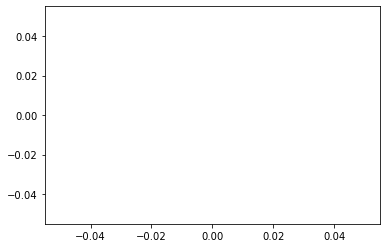

In [31]:
sns.scatterplot(x=dataset)

### Detecting using boxplot

<AxesSubplot:>

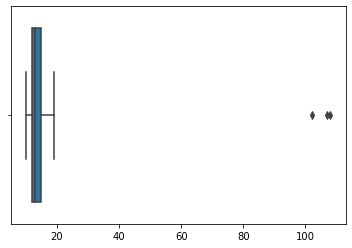

In [7]:
sns.boxplot(x=dataset)

<AxesSubplot:ylabel='Density'>

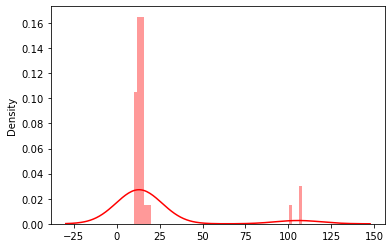

In [23]:
sns.distplot(x=dataset, color='r')

### Detecting outlier using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [12]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [13]:
detect_outliers(dataset)

[102, 107, 108]

In [27]:
dataset_post_removal = [i for i in dataset if i not in outliers]

<AxesSubplot:ylabel='Density'>

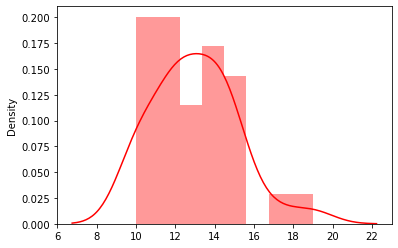

In [28]:
sns.distplot(x=dataset_post_removal, color='r')

### InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [14]:
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [15]:
quantile1, quantile3= np.percentile(dataset,[25,75])

In [16]:
print(quantile1,quantile3)

12.0 15.0


In [17]:
iqr_value=quantile3-quantile1
print(iqr_value)

3.0


In [19]:
lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

In [20]:
print(lower_bound_val,upper_bound_val)

7.5 19.5
